## **ROAD TO AUTOMATION**##

In [1]:

!earthengine authenticate #Authenticate to google earth engine


To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=oQMmHb1HefJEK7FQbg_mhxl_OZPGOKzUZQTpD3Y4Gxs&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWjMNmWX1l_AWmSqaY8lFxd3YfxPT3imq_HqANEymKiwihEWRtiXPDE

Successfully saved authorization token.


In [2]:
!pip install earthengine-api #earth-engine Python API

In [3]:
from google.colab import drive#Authenticating to google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
from google.colab import auth#Authenticating to google cloud
auth.authenticate_user()


In [31]:
import folium 

# Define the URL format used for Earth Engine generated map tiles.
EE_TILES = 'https://earthengine.googleapis.com/map/{mapid}/{{z}}/{{x}}/{{y}}?token={token}'

print('Folium version: ' + folium.__version__)

Folium version: 0.8.3


In [6]:
import ee

ee.Initialize()#initializing the library


In [7]:
#@title Mapdisplay: Display GEE objects using folium.
def Mapdisplay(center, dicc, Tiles="OpensTreetMap",zoom_start=10):
    '''
    :param center: Center of the map (Latitude and Longitude).
    :param dicc: Earth Engine Geometries or Tiles dictionary
    :param Tiles: Mapbox Bright,Mapbox Control Room,Stamen Terrain,Stamen Toner,stamenwatercolor,cartodbpositron.
    :zoom_start: Initial zoom level for the map.
    :return: A folium.Map object.
    '''
    mapViz = folium.Map(location=center,tiles=Tiles, zoom_start=zoom_start)
    for k,v in dicc.items():
      if ee.image.Image in [type(x) for x in v.values()]:
        folium.TileLayer(
            tiles = EE_TILES.format(**v),
            attr  = 'Google Earth Engine',
            overlay =True,
            name  = k
          ).add_to(mapViz)
      else:
        folium.GeoJson(
        data = v,
        name = k
          ).add_to(mapViz)
    mapViz.add_child(folium.LayerControl())
    return mapViz

###* ACCESSING THE SATELLITE IMAGE OF THE INPUT COORDINATES###



In [8]:
# Load a landsat image and select three bands.

sentinel = ee.Image('COPERNICUS/S2/20151128T002653_20151128T102149_T56MNN')\
            .select(['B5','B4', 'B3', 'B2'])

# Create a geometry representing an export region.
geometry = ee.Geometry.Rectangle([79.272713,28.354472,80.01236,29.4849])
center = geometry.centroid().getInfo()['coordinates']
center.reverse()

Mapdisplay(center,{'sentinel':sentinel.getMapId()},zoom_start=7)

###*EXPORTING THE IMAGE TO GOOGLE DRIVE###

In [10]:
# Export the image, specifying scale and region.
task = ee.batch.Export.image.toDrive(**{
    'image': sentinel,
    'description': 'imageToDriveExample',
    'folder':'Example_folder',
    'scale': 100,
    'region': geometry.getInfo()['coordinates']
})
task.start()

In [11]:
import time 
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(5)

Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id: W2VKMMHMRA4DTVQ42FVBNU5Y).
Polling for task (id

In [18]:
# Get band 4 from the Landsat image, copy it.
band4 = sentinel.select('B4').rename('b4_mean')\
               .addBands(sentinel.select('B4').rename('b4_sample'))\
               .addBands(sentinel.select('B4').rename('b4_max'))\
               .addBands(sentinel.select('B2').rename('b2_sample'))\
               .addBands(sentinel.select('B2').rename('b2_mean'))\
               .addBands(sentinel.select('B2').rename('b2_max'))\
               .addBands(sentinel.select('B8').rename('b8_sample'))\
               .addBands(sentinel.select('B8').rename('b8_mean'))\
               .addBands(sentinel.select('B8').rename('b8_max'))\
               .addBands(sentinel.select('B3').rename('b3_sample'))\
               .addBands(sentinel.select('B3').rename('b3_max'))\
               .addBands(sentinel.select('B3').rename('b3_mean'))\
        

# Export the image to an Earth Engine asset.
task = ee.batch.Export.image.toAsset(**{
  'image': band4,
  'description': 'imageToAssetExample',
  'assetId': 'users/reshmasanthoshs/export',
  'scale': 100,
  'region': geometry.getInfo()['coordinates']
})
task.start()

In [19]:
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(5)

Polling for task (id: 72AYEW2BTU2KY7AAU53MNDKV).
Polling for task (id: 72AYEW2BTU2KY7AAU53MNDKV).
Polling for task (id: 72AYEW2BTU2KY7AAU53MNDKV).
Polling for task (id: 72AYEW2BTU2KY7AAU53MNDKV).
Polling for task (id: 72AYEW2BTU2KY7AAU53MNDKV).
Polling for task (id: 72AYEW2BTU2KY7AAU53MNDKV).


In [20]:
# Make a collection of points.
features = ee.FeatureCollection([
  ee.Feature(ee.Geometry.Point(79.272713,28.354472), {'name': 'Gularia'}),
  ee.Feature(ee.Geometry.Point(77.3910,28.5355), {'name': 'Noida'}),
  ee.Feature(ee.Geometry.Point(77.3178,28.4089 ), {'name': 'Faridabad'})
])
center = features.geometry().centroid().getInfo()['coordinates']
center.reverse()
Mapdisplay(center,{'feature_example':features.getInfo()},zoom_start=2)

In [21]:
# Export the FeatureCollection to a KML file.
task = ee.batch.Export.table.toDrive(**{
  'collection': features,
  'description':'vectorsToDriveExample',
  'fileFormat': 'SHP'
})
task.start()

In [22]:
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(5)

Polling for task (id: 4VDP5UDM32EYMACJRL47ON4Y).
Polling for task (id: 4VDP5UDM32EYMACJRL47ON4Y).
Polling for task (id: 4VDP5UDM32EYMACJRL47ON4Y).
Polling for task (id: 4VDP5UDM32EYMACJRL47ON4Y).


In [23]:
# Export an ee.FeatureCollection as an Earth Engine asset.
task = ee.batch.Export.table.toAsset(**{
    'collection': features,
    'description':'exportToTableAssetExample',
    'assetId': 'users/reshmasanthosh/ibm'
})
task.start()

In [ ]:
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(5)

In [24]:
!pip install rasterio
import numpy
from matplotlib import colors
import math
import rasterio
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

     |████████████████████████████████| 19.3 MB 1.4 MB/s 


## **NDVI ANALYSIS OF 4 BAND SATELLITE IMAGE**

Minimum value of NDVI obtained: -0.1797752808988764
Maximum value of NDVI obtained: 0.65


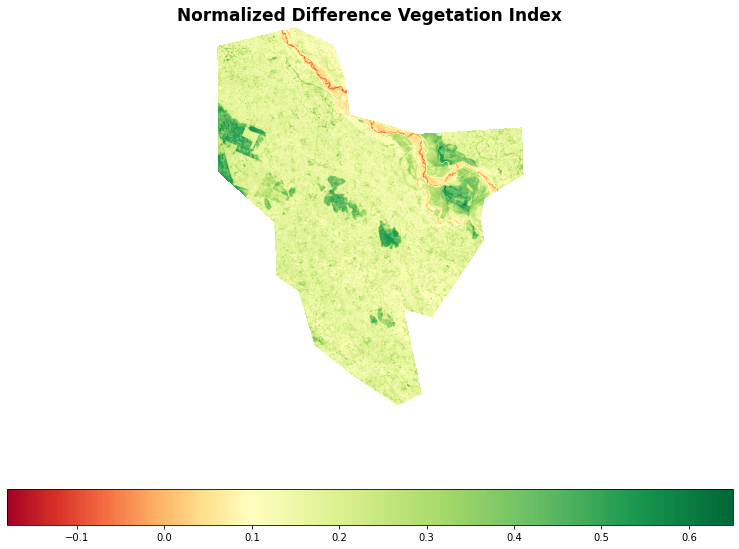

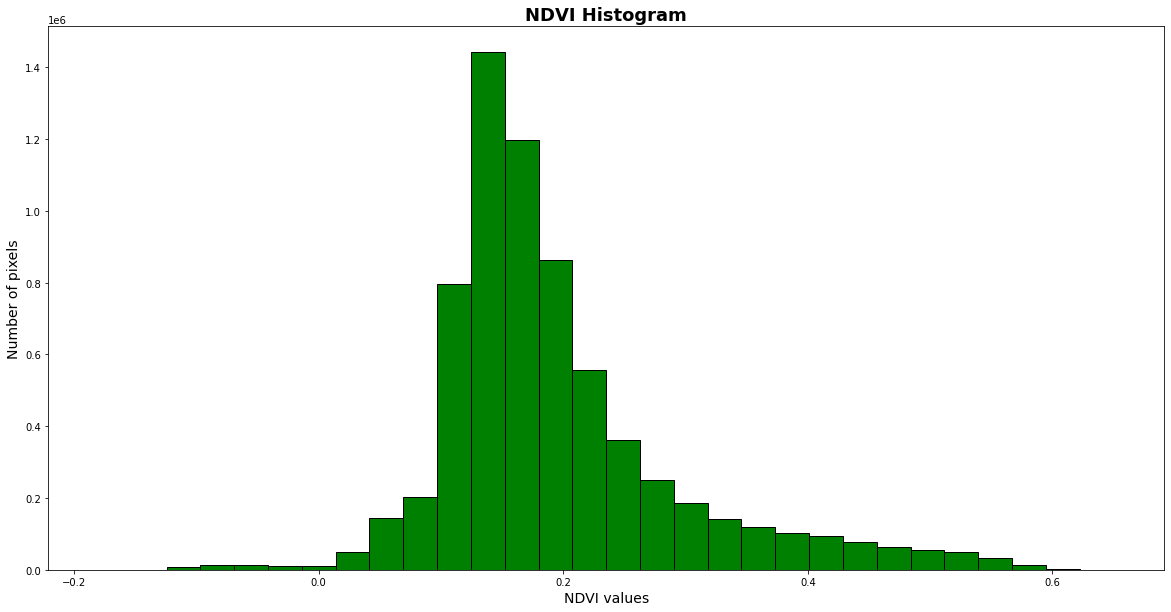

In [25]:
def agriculture(a):
  image_file = a
  sat_data = rasterio.open(image_file)

  # getting dimentions in m
  width_in_projected_units = sat_data.bounds.right - sat_data.bounds.left
  height_in_projected_units = sat_data.bounds.top - sat_data.bounds.bottom

  # Upper left pixel
  row_min = 0
  col_min = 0

  # Lower right pixel.  Rows and columns are zero indexing.
  row_max = sat_data.height - 1
  col_max = sat_data.width - 1

  # Transform coordinates with the dataset's affine transformation.
  topleft = sat_data.transform * (row_min, col_min)
  botright = sat_data.transform * (row_max, col_max)


  # sequence of band indexes, we have taken a 4 band image, Loading the 4 bands into 2d arrays
  b, g, r, n = sat_data.read()

  filename =a
  with rasterio.open(filename) as src:
      band_red = src.read(3)
  with rasterio.open(filename) as src:
      band_nir = src.read(4)

  #To not display error when divided by zero 

  numpy.seterr(divide='ignore', invalid='ignore')

  # NDVI convertion
  ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)

  print("Minimum value of NDVI obtained:",numpy.nanmin(ndvi)) 
  print("Maximum value of NDVI obtained:",numpy.nanmax(ndvi))

  # get the metadata of original GeoTIFF:
  meta = src.meta

  # get the dtype of our NDVI array:
  ndvi_dtype = ndvi.dtype

  # set the source metadata as kwargs we'll use to write the new data:
  kwargs = meta

  # update the 'dtype' value to match our NDVI array's dtype:
  kwargs.update(dtype=ndvi_dtype)

  # update the 'count' value since our output will no longer be a 4-band image:
  kwargs.update(count=1)

  # using rasterio to write new raster file 'data/ndvi.tif':
  with rasterio.open('ndvi.tif', 'w', **kwargs) as dst:
          dst.write(ndvi, 1)
  # colour coding the NVDI image for better understanding
  class MidpointNormalize(colors.Normalize):
    
      def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
          self.midpoint = midpoint
          colors.Normalize.__init__(self, vmin, vmax, clip)

      def __call__(self, value, clip=None):
        
          x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
          return numpy.ma.masked_array(numpy.interp(value, x, y), numpy.isnan(value))

  # Set min/max values from NDVI range for image
  
  min=numpy.nanmin(ndvi)
  max=numpy.nanmax(ndvi)

  # Set custom midpoint for most effective NDVI analysis
  mid=0.1

  # Setting color scheme
  colormap = plt.cm.RdYlGn 
  norm = MidpointNormalize(vmin=min, vmax=max, midpoint=mid)
  fig = plt.figure(figsize=(20,10))


  ax = fig.add_subplot(111)

  # Using 'imshow' to specify the input data, colormap, min, max, and norm for the colorbar
  cbar_plot = ax.imshow(ndvi, cmap=colormap, vmin=min, vmax=max, norm=norm)


  # Turning off the display of axis labels 
  ax.axis('off')

  # Seeing a title 
  ax.set_title('Normalized Difference Vegetation Index', fontsize=17, fontweight='bold')

  # Configuring the colorbar
  cbar = fig.colorbar(cbar_plot, orientation='horizontal', shrink=0.65)

  # Calling 'savefig' to save plot to an image file
  fig.savefig("ndvi-image.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

  # visualizing
  plt.show()

  # Define a new figure
  fig2 = plt.figure(figsize=(20,10))

  # Give this new figure a subplot, which will contain the histogram itself
  ax = fig2.add_subplot(111)

  # Add a title & (x,y) labels to the plot
  plt.title("NDVI Histogram", fontsize=18, fontweight='bold')
  plt.xlabel("NDVI values", fontsize=14)
  plt.ylabel("Number of pixels", fontsize=14)


  # For the x-axis, we want to count every pixel that is not an empty value
  x = ndvi[~numpy.isnan(ndvi)]
  color = 'g'
  # call 'hist` with our x-axis, bins, and color details
  ax.hist(x,bins=30,color=color,histtype='bar', ec='black')

  # Save the generated figure to an external image file
  #fig2.savefig("ndvi-histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.5)

  plt.show()

agriculture("/content/sample_data/15 november 2021.tif")



## **VISUALIZING WEATHER DATA**

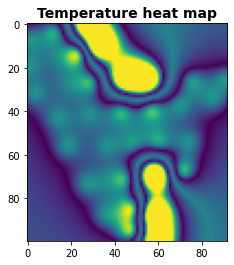

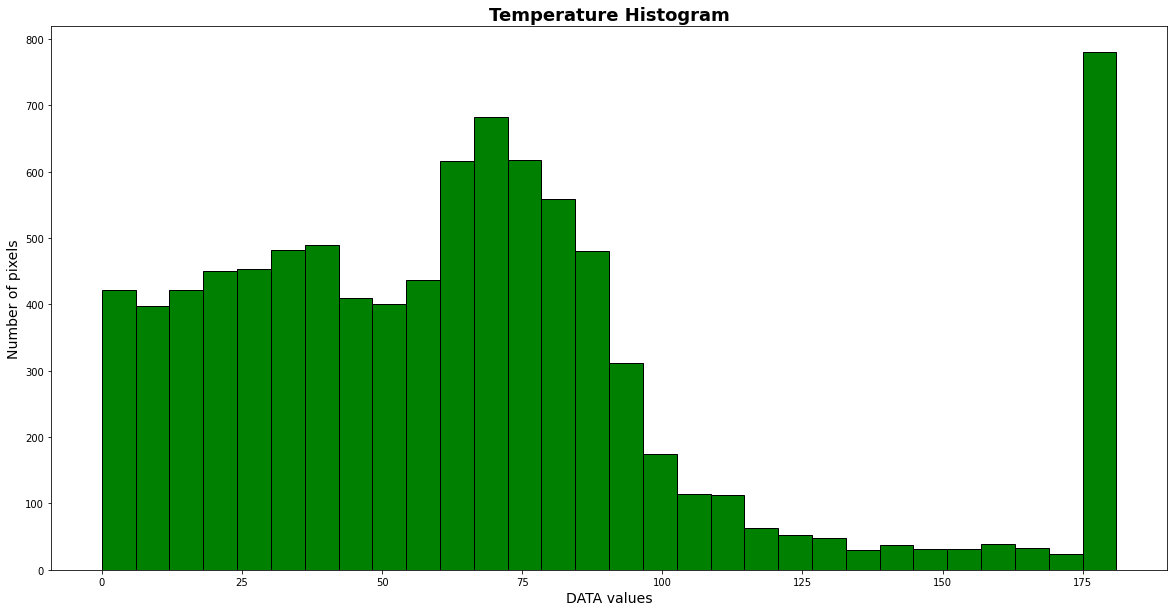

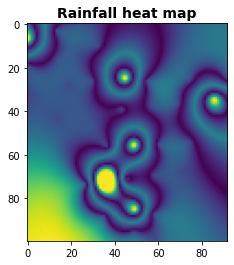

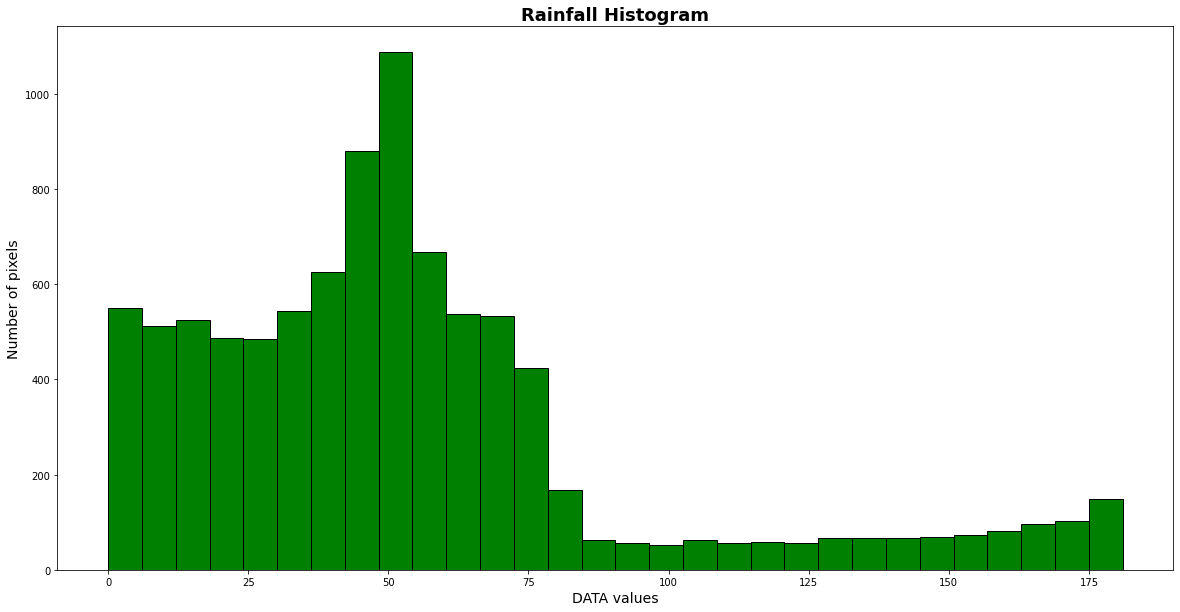

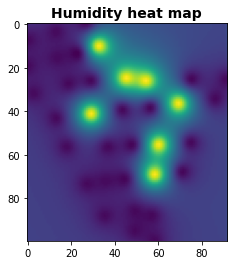

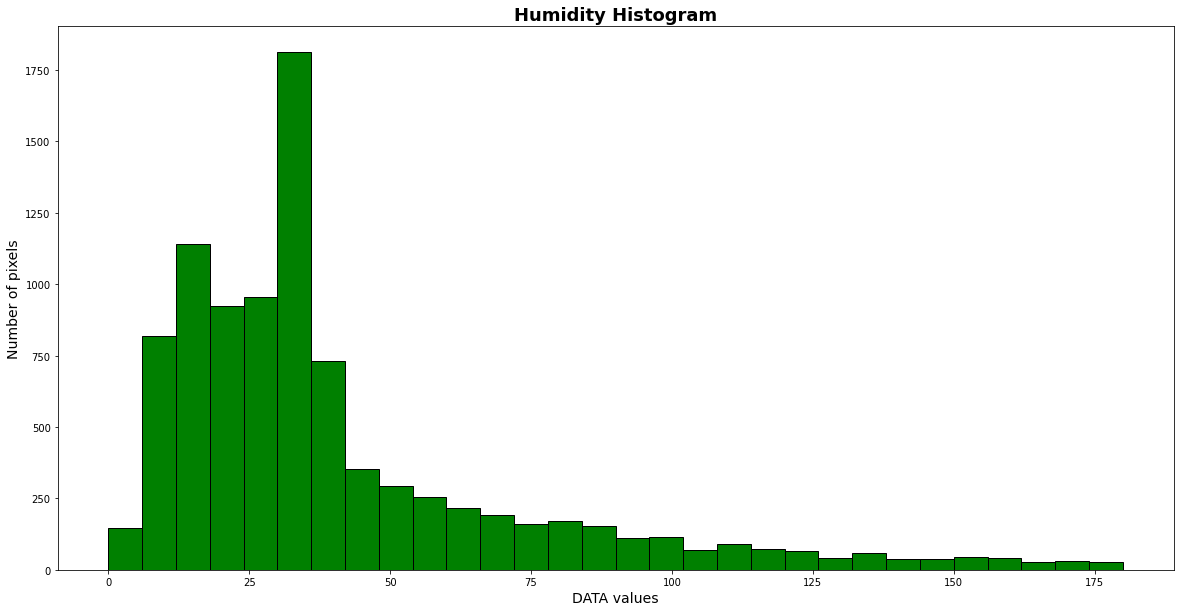

In [26]:
final_ndvi="ndvi.tif"
sat_dataF = rasterio.open(final_ndvi)
d=sat_dataF.height
e=sat_dataF.width
total=d*e
bandF1=sat_dataF.read(1)
result=numpy.where((bandF1>=0.2) & (bandF1<=0.25))

#list of coordinates we think are affected crops, accessible using loop
LOC=list(zip(result[0],result[1]))


#3 significant diseases found in the area of interest for Redrot,Brown rust and Grassy shoot

image_fileT = "/content/sample_data/Temp.tif"
sat_dataT = rasterio.open(image_fileT)
band3=sat_dataT.read(1)
fig = plt.imshow(band3)
plt.title("Temperature heat map", fontsize=14, fontweight='bold')
plt.show()

 # Define a new figure
fig2 = plt.figure(figsize=(20,10))

 # Give this new figure a subplot, which will contain the histogram itself
ax = fig2.add_subplot(111)

 # Add a title & (x,y) labels to the plot
plt.title("Temperature Histogram", fontsize=18, fontweight='bold')
plt.xlabel("DATA values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)


  # For the x-axis, we want to count every pixel that is not an empty value
x = band3[~numpy.isnan(band3)]
color = 'g'
  # call 'hist` with our x-axis, bins, and color details
ax.hist(x,bins=30,color=color,histtype='bar', ec='black')
plt.show()


image_fileR = "/content/sample_data/Rain.tif"
sat_dataR = rasterio.open(image_fileR)
band33=sat_dataR.read(1)
fig = plt.imshow(band33)
plt.title("Rainfall heat map", fontsize=14, fontweight='bold')
plt.show()

 # Defining a new figure
fig2 = plt.figure(figsize=(20,10))

 # Give this new figure a subplot, which will contain the histogram itself
ax = fig2.add_subplot(111)

 # Adding a title & (x,y) labels to the plot
plt.title("Rainfall Histogram", fontsize=18, fontweight='bold')
plt.xlabel("DATA values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)


 # For the x-axis counting every pixel that is not an empty value
x = band33[~numpy.isnan(band33)]
color = 'g'
 # calling 'hist` with our x-axis, bins, and color details
ax.hist(x,bins=30,color=color,histtype='bar', ec='black')
plt.show()


image_fileH = "/content/sample_data/Humidity.tif"
sat_dataH = rasterio.open(image_fileH)
band333=sat_dataH.read(1)
fig = plt.imshow(band333)
plt.title("Humidity heat map", fontsize=14, fontweight='bold')
plt.show()

 # Defining a new figure
fig2 = plt.figure(figsize=(20,10))

 # Giving this new figure a subplot, which will contain the histogram itself
ax = fig2.add_subplot(111)

 # Adding a title & (x,y) labels to the plot
plt.title("Humidity Histogram", fontsize=18, fontweight='bold')
plt.xlabel("DATA values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)


 # For the x-axis counting every pixel that is not an empty value
x = band333[~numpy.isnan(band333)]
color = 'g'
 # calling 'hist` with our x-axis, bins, and color details
ax.hist(x,bins=30,color=color,histtype='bar', ec='black')
plt.show()

## **ML MODEL**

In [27]:
dataframe =pd.read_csv("/content/sample_data/Fertilizer Prediction.csv")
dataframe.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [28]:
class fetrilizerPrediction:

  def __init__(self, database, mapVal):
    self.features = ['Temparature','Humidity','Moisture','Soil Type','Crop Type','Nitrogen','Potassium','Phosphorous']
    self.df = database
    self.mapVal = mapVal
    self.y = self.df['Fertilizer Name'].copy()
    self.X = self.df.drop('Fertilizer Name', axis=1).copy()


  def createModel(self):
    self.ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
    self.X = np.array(self.ct.fit_transform(self.X))
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, train_size=0.7, shuffle=True, random_state=42)
    self.sc = StandardScaler()
    self.X_train = self.sc.fit_transform(self.X_train)
    self.X_test = self.sc.transform(self.X_test)
    self.classifier = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42)
    self.classifier.fit(self.X_train, self.y_train)
    self.userInput()
    #return self.classifier


  def encode_scalar(self,feature_input):  
    #feature_input = [ 36,	68,	41,	'Red',	'Ground Nuts',	41,	0	,0 ]
    self.np_array = np.array(feature_input)
    self.np_array = self.np_array.reshape(1,-1)
    self.np_array = self.np_array.tolist()
    self.X_encode = np.array(self.ct.transform(self.np_array))
    self.X_transform = self.sc.transform(self.X_encode)
    return self.X_transform


  def updateDatabase(self, newData):

    self.temp = []
    feat = ['Temperature','Humidity','Moisture','Soil Type','Crop Type','Nitrogen','Potassium','Phosphorous', 'Fertilizer Name']
    #k = ['45', '45', '15', 'Black', 'Maize', '41', '15', '47', 'urea']
    self.temp.append(newData)
    self.new_data_pd = pd.DataFrame(self.temp, columns = feat)
    dataframe.append(self.new_data_pd)

    #return df

  def userInput(self):
    
    self.user_input = []
    self.user_input = self.mapVal.copy()

    for item in self.features[3:]:
      if item == 'Soil Type':
        print ("\n The different Soil Types are :\n Sandy, Loamy, Black, Red, Clayey \n" ) 
        temp = input("Enter " + item + " : ")
      elif item=='Crop Type': 
        print("\n The different Crop Types are : \n Maize, Sugarcane, Cotton, Tobacco, Paddy, Barley, Millets, Oil seeds, Pulses, Ground Nuts, Wheat \n ")
        temp = input("Enter " + item + " : ")
      else:
        temp = input("Enter " + item + " : ")
      self.user_input.append(temp)
    self.database_entry = self.user_input.copy()
    self.new_data = input("Currently used fertilizer : ")
    self.database_entry.append(self.new_data)
    #self.updateDatabase(self.database_entry)
    #print(self.user_input, self.database_entry)
    #return self.user_input
    self.modelPrediction(self.user_input)
    self.updateDatabase(self.database_entry)

  def modelPrediction(self, user_input):
    self.encoded_user_input = self.encode_scalar(self.user_input)
    self.fertilizer_suggestion = self.classifier.predict(self.encoded_user_input)
    print("\n \n Suggested Fertilizer : " , self.fertilizer_suggestion[0], "\n\n")


In [29]:
def ML_Model(arr):
  instance = fetrilizerPrediction(dataframe, arr)
  model = instance.createModel()

## **IDENTIFICATION OF POSSIBLE DISEASES AND FERTILIZER RECOMMENDATION**

In [30]:
#Checking redrot Brown rust and Grassy shoot percentages according to indexes [temperature,rainfall,humidity]
r,b,p,w,y,s,l,re=0,0,0,0,0,0,0,0
dict1={'r':1,'b':1,'p':1,'w':1,'y':1,'s':1,'l':1,'re':1}
#declarinf arrays for temperature,humidity,rainfall values
T1,T2,T3,T4,T5,T6,T7,T8=[],[],[],[],[],[],[],[]
H1,H2,H3,H4,H5,H6,H7,H8=[],[],[],[],[],[],[],[]
R1,R2,R3,R4,R5,R6,R7,R8=[],[],[],[],[],[],[],[]
for u in LOC:
  i=(u[0]//50,u[1]//50)
  if (band3[i]<=25 and band33[i]>=175 and band333[i]<=50):
    T1.append(band3[i])
    H1.append(band33[i])
    R1.append(band333[i])
    r+=1
    if (r==1):
      #finding location(lat,long)
      row=u[0]
      col=u[1]
      # Transform coordinates with the dataset's affine transformation.
      locationR = sat_dataF.transform * (row, col)
      print("Redrot found in lat,long: {}".format(locationR))
      
  elif (band3[i]>=125 and 25<=band33[i]<=100 and 0<=band333[i]>=175):
    T2.append(band3[i])
    H2.append(band33[i])
    R2.append(band333[i])
    b+=1
    if (b==1):
      #finding location(lat,long)
      row=u[0]
      col=u[1]
      # Transforming coordinates with the dataset's affine transformation.
      locationB = sat_dataF.transform * (row, col)
      print("Brown rust found in lat,long: {}".format(locationB))

  elif (25<=band3[i]<=125 and 25<=band33[i]<=100 and band333[i]>=175):
    T3.append(band3[i])
    H3.append(band33[i])
    R3.append(band333[i])
    p+=1
    if (p==1):
      #finding location(lat,long)
      row=u[0]
      col=u[1]
      # Transforming coordinates with the dataset's affine transformation.
      locationP = sat_dataF.transform * (row, col)
      print("Pokkahboeng found in lat,long: {}".format(locationP))

  elif (25<=band3[i]<=125 and 25<=band33[i]<=100 and band333[i]<=50):
    T4.append(band3[i])
    H4.append(band33[i])
    R4.append(band333[i])
    w+=1
    if (w==1):
      #finding location(lat,long)
      row=u[0]
      col=u[1]
      # Transforming coordinates with the dataset's affine transformation.
      locationW = sat_dataF.transform * (row, col)
      print("Wilt found in lat,long: {}".format(locationW))
     
  elif (band3[i]>=125 and band33[i]>=175 and band333[i]<=50):
    T5.append(band3[i])
    H5.append(band33[i])
    R5.append(band333[i])
    y+=1
    if (y==1):
      #finding location(lat,long)
      row=u[0]
      col=u[1]
      # Transforming coordinates with the dataset's affine transformation.
      locationY = sat_dataF.transform * (row, col)
      print("Yellow leaf disease found in lat,long: {}".format(locationY))
      
  elif (band3[i]>=125 and 25<=band33[i]<=100 and band333[i]<=50):
    T6.append(band3[i])
    H6.append(band33[i])
    R6.append(band333[i])
    s+=1
    if (s==1):
      #finding location(lat,long)
      row=u[0]
      col=u[1]
      # Transforming coordinates with the dataset's affine transformation.
      locationS = sat_dataF.transform * (row, col)
      print("Smult shoot found in lat,long: {}".format(locationS))
      
  elif (band3[i]<=25 and band33[i]<=50 and band333[i]<=25):
    T7.append(band3[i])
    H7.append(band33[i])
    R7.append(band333[i])
    l+=1
    if (l==1):
      #finding location(lat,long)
      row=u[0]
      col=u[1]
      # Transforming coordinates with the dataset's affine transformation.
      locationL = sat_dataF.transform * (row, col)
      print("Leafscale disease found in lat,long: {}".format(locationL))
      
  elif (band3[i]<=25 and 25<=band33[i]<=100 and band333[i]>=175):
    T8.append(band3[i])
    H8.append(band33[i])
    R8.append(band333[i])
    re+=1
    if (re==1):
      #finding location(lat,long)
      row=u[0]
      col=u[1]
      # Transforming coordinates with the dataset's affine transformation.
      locationRE = sat_dataF.transform * (row, col)
      print("Red Striped disease  found in lat,long: {}".format(locationRE))
      
  else:
    pass
if (r==0):
      dict1['r']=0
      print("Redrot disease not likely to be encountered!")
if (b==0):
      print("brownrust disease not likely to be encountered!")
      dict1['b']=0
if (p==0):
      print("Pokkahboeng disease not likely to be encountered!")
      dict1['p']=0
if (w==0):
      print("Wilt disease not likely to be encountered!")
      dict1['w']=0
if (y==0):
      print("Yellow leaf disease  not likely to be encountered!")
      dict1['y']=0
if (s==0):
      print("Smult disease not likely to be encountered!")
      dict1['s']=0
if (l==0):
      print("Leafscale disease not likely to be encountered!")
      dict1['l']=0
if (re==0):
      print("Red Striped disease  not likely to be encountered!")
      dict1['re']=0
#Amount of each disease in given AOI (r,b,g)
#Coverting to perfectage values
rp=(r/total)*100
bp=(b/total)*100
pp=(p/total)*100
wp=(w/total)*100
yp=(y/total)*100
sp=(s/total)*100
lp=(l/total)*100
rep=(re/total)*100
print("{} % area vulnerable to redrot disease, {} % area vulnerable to brownrust disease, {} % area vulnerable to Pokkahboeng disease, {} % area vulnerable to Wilt disease,{} % area vulnerable to Yellow leaf disease ,{} % area vulnerable to Smult disease ,{} % area vulnerable to Leafscale disease,{} % area vulnerable to Red Striped disease ".format(rp,bp,pp,wp,yp,sp,lp,rep))

#Passing values to the ML model
#NewValue = (((OldValue - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin
#oldminT=0   oldminH=0   oldminR=0
#oldmaxT=180   oldmaxH=180  oldmaxR=180
#NewminT=11  NewminH=34  NewminR=19
#NewmaxT=29  NewmaxH=82  NewmaxR=34
if (dict1['r']==1):
  Temp1=int((((sum(T1)/len(T1))*(29-11))/180)+11)
  Hum1=int((((sum(H1)/len(H1))*(82-34))/180)+34)
  Rain1=int(((((sum(R1)/len(R1)))*(70-19))/180)+19)
  a1=[]
  a1.append(Temp1)
  a1.append(Hum1)
  a1.append(Rain1)
  passingValues = a1
  print("Disease:Redrot")
  ML_Model(passingValues)

if (dict1['b']==1):
  Temp2=int((((sum(T2)/len(T2))*(35-11))/180)+11)
  Hum2=int((((sum(H2)/len(H2))*(82-34))/180)+34)
  Rain2=int(((((sum(R2)/len(R2)))*(70-19))/180)+19)
  a2=[]
  a2.append(Temp2)
  a2.append(Hum2)
  a2.append(Rain2)
  passingValues = a2
  print("Disease:brown Rust")
  ML_Model(passingValues)
  
if (dict1['p']==1):
  Temp3=int((((sum(T3)/len(T3))*(35-11))/180)+11)
  Hum3=int((((sum(H3)/len(H3))*(82-34))/180)+34)
  Rain3=int(((((sum(R3)/len(R3)))*(70-19))/180)+19)
  a3=[]
  a3.append(Temp3)
  a3.append(Hum3)
  a3.append(Rain3)
  passingValues = a3
  print("Disease:Pokkahboeng")
  ML_Model(passingValues)

if (dict1['w']==1):
  Temp4=int((((sum(T4)/len(T4))*(35-11))/180)+11)
  Hum4=int((((sum(H4)/len(H4))*(82-34))/180)+34)
  Rain4=int(((((sum(R4)/len(R4)))*(70-19))/180)+19)
  a4=[]
  a4.append(Temp4)
  a4.append(Hum4)
  a4.append(Rain4)
  passingValues = a4
  print("Disease:Wilt1")
  ML_Model(passingValues)

if (dict1['y']==1):
  Temp5=int((((sum(T5)/len(T5))*(35-11))/180)+11)
  Hum5=int((((sum(H5)/len(H5))*(82-34))/180)+34)
  Rain5=int(((((sum(R5)/len(R5)))*(70-19))/180)+19)
  a5=[]
  a5.append(Temp5)
  a5.append(Hum5)
  a5.append(Rain5)
  passingValues = a5
  print("Disease:Yellow leaf disease ")
  ML_Model(passingValues)

if (dict1['s']==1):
  Temp6=int((((sum(T6)/len(T6))*(35-11))/180)+11)
  Hum6=int((((sum(H6)/len(H6))*(82-34))/180)+34)
  Rain6=int(((((sum(R6)/len(R6)))*(70-19))/180)+19)
  a6=[]
  a6.append(Temp6)
  a6.append(Hum6)
  a6.append(Rain6)
  passingValues = a6
  print("Disease:Smult")
  ML_Model(passingValues)

if (dict1['l']==1):
  Temp7=int((((sum(T7)/len(T7))*(35-11))/180)+11)
  Hum7=int((((sum(H7)/len(H7))*(82-34))/180)+34)
  Rain7=int(((((sum(R7)/len(R7)))*(70-19))/180)+19)
  a7=[]
  a7.append(Temp7)
  a7.append(Hum7)
  a7.append(Rain7)
  passingValues = a7
  print("Disease:Leafscale disease")
  ML_Model(passingValues)

if (dict1['re']==1):
  Temp8=int((((sum(T8)/len(T8))*(35-11))/180)+11)
  Hum8=int((((sum(H8)/len(H8))*(82-34))/180)+34)
  Rain8=int(((((sum(R8)/len(R8)))*(70-19))/180)+19)
  a8=[]
  a8.append(Temp8)
  a8.append(Hum8)
  a8.append(Rain8)
  passingValues = a8
  print("Disease:Red Striped disease ")
  ML_Model(passingValues)


Leafscale disease found in lat,long: (451150.0, 3128740.0)
Wilt found in lat,long: (451250.0, 3128200.0)
Smult shoot found in lat,long: (452820.0, 3125080.0)
Brown rust found in lat,long: (464100.0, 3109180.0)
Pokkahboeng found in lat,long: (471600.0, 3122060.0)
Redrot disease not likely to be encountered!
Yellow leaf disease  not likely to be encountered!
Red Striped disease  not likely to be encountered!
0.0 % area vulnerable to redrot disease, 0.003373533315769295 % area vulnerable to brownrust disease, 0.0034044831627029586 % area vulnerable to Pokkahboeng disease, 4.0127559794137095 % area vulnerable to Wilt disease,0.0 % area vulnerable to Yellow leaf disease ,0.12342025210971565 % area vulnerable to Smult disease ,0.05204216761895477 % area vulnerable to Leafscale disease,0.0 % area vulnerable to Red Striped disease 
Disease:brown Rust

 The different Soil Types are :
 Sandy, Loamy, Black, Red, Clayey 

Enter Soil Type : Sandy

 The different Crop Types are : 
 Maize, Sugarcane,

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  "X does not have valid feature names, but"



 
 Suggested Fertilizer :  17-17-17 


Disease:Pokkahboeng

 The different Soil Types are :
 Sandy, Loamy, Black, Red, Clayey 

Enter Soil Type : Red

 The different Crop Types are : 
 Maize, Sugarcane, Cotton, Tobacco, Paddy, Barley, Millets, Oil seeds, Pulses, Ground Nuts, Wheat 
 
Enter Crop Type : Sugarcane
Enter Nitrogen : 10
Enter Potassium : 15
Enter Phosphorous : 18
Currently used fertilizer : DAP


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  "X does not have valid feature names, but"



 
 Suggested Fertilizer :  17-17-17 


Disease:Wilt1

 The different Soil Types are :
 Sandy, Loamy, Black, Red, Clayey 

Enter Soil Type : Loamy

 The different Crop Types are : 
 Maize, Sugarcane, Cotton, Tobacco, Paddy, Barley, Millets, Oil seeds, Pulses, Ground Nuts, Wheat 
 
Enter Crop Type : Paddy
Enter Nitrogen : 12
Enter Potassium : 10
Enter Phosphorous : 20
Currently used fertilizer : Urea


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  "X does not have valid feature names, but"



 
 Suggested Fertilizer :  17-17-17 


Disease:Smult

 The different Soil Types are :
 Sandy, Loamy, Black, Red, Clayey 

Enter Soil Type : Red

 The different Crop Types are : 
 Maize, Sugarcane, Cotton, Tobacco, Paddy, Barley, Millets, Oil seeds, Pulses, Ground Nuts, Wheat 
 
Enter Crop Type : Sugarcane
Enter Nitrogen : 12
Enter Potassium : 13
Enter Phosphorous : 14
Currently used fertilizer : DAP


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  "X does not have valid feature names, but"



 
 Suggested Fertilizer :  17-17-17 


Disease:Leafscale disease

 The different Soil Types are :
 Sandy, Loamy, Black, Red, Clayey 

Enter Soil Type : Clayey

 The different Crop Types are : 
 Maize, Sugarcane, Cotton, Tobacco, Paddy, Barley, Millets, Oil seeds, Pulses, Ground Nuts, Wheat 
 
Enter Crop Type : Cotton
Enter Nitrogen : 15
Enter Potassium : 19
Enter Phosphorous : 16
Currently used fertilizer : 17-17-17

 
 Suggested Fertilizer :  17-17-17 




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  "X does not have valid feature names, but"


## **SENDING REPORT DATA**

In [ ]:
#sending email
import smtplib
  
# creates SMTP session
s = smtplib.SMTP('smtp.gmail.com', 587)
  
# start TLS for security
s.starttls()
  
# Authentication
s.login("impulseraas@gmail.com", "Somebirds")
  
# message to be sent
message = ('''{} % of redrot is detected, {} % of brown rust is detected, {} % of Pokkahboeng is detected,
{} % of Wilt is detected, {} % of Yellow leaf disease is detected, {} % of Smult is detected, 
{} % of Leafscale disease is detected, {} % of Red Striped disease  is detected'''.format(rp,bp,pp,wp,yp,sp,lp,rep))
  
# sending the mail
s.sendmail("impulseraas@gmail.com", "ananyasudeepkv@gmail.com", message)
  
# terminating the session
s.quit()

# **ANALYSIS REPORT (OUTPUT TO USER)**

# **DIASEASES LIKELY TO BE FOUND WITH LAT LONG VALUES**

1, Leafscale disease found in lat,long: (451150.0, 3128740.0)

2, Wilt found in lat,long: (451250.0, 3128200.0)

3, Smult shoot found in lat,long: (452820.0, 3125080.0)

4, Brown rust found in lat,long: (464100.0, 3109180.0)

5, Pokkahboeng found in lat,long: (471600.0, 3122060.0)

*Redrot disease,Yellow leaf and Red Striped disease not likely to be encountered!*

**PERCENTAGE AREA VULNERABLE**

0.003373533315769295 % area vulnerable to brownrust disease

0.0034044831627029586 % area vulnerable to Pokkahboeng disease

4.0127559794137095 % area vulnerable to Wilt disease

0.12342025210971565 % area vulnerable to Smult disease

0.05204216761895477 % area vulnerable to Leafscale disease

# **Disease:Brown Rust**

The different Soil Types are :
Sandy, Loamy, Black, Red, Clayey 

Enter Soil Type : Sandy

The different Crop Types are : 
Maize, Sugarcane, Cotton, Tobacco, Paddy, Barley,Millets, Oil seeds, Pulses, Ground Nuts, Wheat 
 
Enter Crop Type : Sugarcane
Enter Nitrogen : 10
Enter Potassium : 20
Enter Phosphorous : 10
Currently used fertilizer : Urea

          Suggested Fertilizer :  17-17-17 


# **Disease:Pokkahboeng**

The different Soil Types are :
Sandy, Loamy, Black, Red, Clayey 

Enter Soil Type : Loamy

The different Crop Types are : 
Maize, Sugarcane, Cotton, Tobacco, Paddy, Barley, Millets, Oil seeds, Pulses, Ground Nuts, Wheat 
 
Enter Crop Type : Sugarcane
Enter Nitrogen : 20
Enter Potassium : 10
Enter Phosphorous : 10
Currently used fertilizer : DTP

          Suggested Fertilizer :  17-17-17 


# **Disease:Wilt**

The different Soil Types are :
Sandy, Loamy, Black, Red, Clayey 

Enter Soil Type : Black

The different Crop Types are : 
Maize, Sugarcane, Cotton, Tobacco, Paddy, Barley, Millets, Oil seeds, Pulses, Ground Nuts, Wheat 
 
Enter Crop Type : Sugarcane
Enter Nitrogen : 20
Enter Potassium : 15
Enter Phosphorous : 20
Currently used fertilizer : Urea

          Suggested Fertilizer :  17-17-17 


# **Disease:Smult**

The different Soil Types are :
Sandy, Loamy, Black, Red, Clayey 

Enter Soil Type : Red

The different Crop Types are : 
Maize, Sugarcane, Cotton, Tobacco, Paddy, Barley, Millets, Oil seeds, Pulses, Ground Nuts, Wheat 
 
Enter Crop Type : Sugarcane
Enter Nitrogen : 15
Enter Potassium : 20
Enter Phosphorous : 14
Currently used fertilizer : DTP

           Suggested Fertilizer :  17-17-17 


# **Disease:Leafscale disease**

The different Soil Types are :
Sandy, Loamy, Black, Red, Clayey 

Enter Soil Type : Clayey

The different Crop Types are : 
Maize, Sugarcane, Cotton, Tobacco, Paddy, Barley, Millets, Oil seeds, Pulses, Ground Nuts, Wheat 
 
Enter Crop Type : Sugarcane
Enter Nitrogen : 12
Enter Potassium : 14
Enter Phosphorous : 20
Currently used fertilizer : Urea

            Suggested Fertilizer :  17-17-17 
